In [35]:
import pandas as pd

In [36]:
# create df
election_df = pd.read_csv('elections.csv')

In [37]:
election_df.head(4)

,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,Lab hold,lab,con,50750,31598,82,10490,6518,17008,...,450,0,2711,0,0,0,0,0,731,0
1,W07000058,Con hold,con,lab,44699,31865,123,2034,14687,12653,...,0,0,2704,0,0,0,0,0,0,0
2,S14000001,SNP hold,snp,con,62489,37413,72,12670,7535,4939,...,880,20205,0,0,0,0,0,0,0,0
3,S14000002,SNP gain from Con,snp,con,65719,45638,131,3990,16398,3834,...,0,20388,0,0,0,0,0,0,0,0


In [38]:
election_df['first_party'][0:4]

0    lab
1    con
2    snp
3    snp
Name: first_party, dtype: object

In [39]:
partiesdf = election_df['first_party'].unique()
partiesdf

array(['lab', 'con', 'snp', 'pc', 'ld', 'dup', 'sf', 'sdlp', 'green',
       'spk', 'alliance'], dtype=object)

In [40]:
labwinsdf = len(election_df[election_df['first_party'] == 'lab'])
labwinsdf

202

In [41]:
election_df['first_party'] == 'lab'

0       True
1      False
2      False
3      False
4      False
       ...  
645     True
646    False
647    False
648     True
649    False
Name: first_party, Length: 650, dtype: bool

In [42]:
election_df[election_df['first_party']=='lab']

,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,lab,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,Lab hold,lab,con,50750,31598,82,10490,6518,17008,...,450,0,2711,0,0,0,0,0,731,0
8,W07000043,Lab hold,lab,con,62789,43008,121,213,18058,18271,...,0,0,1453,0,0,0,0,0,0,0
16,E14000537,Lab hold,lab,con,67978,38579,125,4263,14281,18544,...,1208,0,0,0,0,0,0,0,0,0
21,E14000540,Lab hold,lab,con,77953,44499,120,15427,11792,27219,...,820,0,0,0,0,0,0,0,0,0
22,E14000541,Lab hold,lab,brexit,65277,36903,105,3571,7892,14804,...,900,0,0,0,0,0,0,0,898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,E14001044,Lab hold,lab,con,55550,42918,107,3003,17692,20695,...,965,0,0,0,0,0,0,0,0,0
635,E14001050,Lab hold,lab,con,62883,33443,78,1235,14287,15522,...,521,0,0,0,0,0,0,0,0,0
639,E14001054,Lab hold,lab,con,75219,44707,118,3219,17227,20446,...,1300,0,0,0,0,0,0,0,0,0
645,E14001059,Lab hold,lab,con,76313,44759,125,10396,13459,23855,...,1559,0,0,0,0,0,0,0,58,0


In [43]:
partywinsdf = []

for i in partiesdf:
    partywinsdf.append(len(election_df[election_df['first_party']==i]))
print(partiesdf)
partywinsdf

['lab' 'con' 'snp' 'pc' 'ld' 'dup' 'sf' 'sdlp' 'green' 'spk' 'alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [44]:
partywinsdf = [len(election_df[election_df['first_party']==i]) for i in partiesdf]
print(partiesdf)
partywinsdf

['lab' 'con' 'snp' 'pc' 'ld' 'dup' 'sf' 'sdlp' 'green' 'spk' 'alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [45]:
partiesdf

array(['lab', 'con', 'snp', 'pc', 'ld', 'dup', 'sf', 'sdlp', 'green',
       'spk', 'alliance'], dtype=object)

In [46]:
# make image background white for use in external docs
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

<AxesSubplot:title={'center':'Seat allocation per party'}>

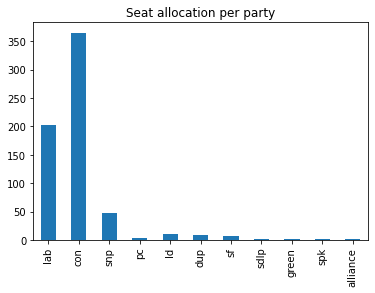

In [47]:
seat_allocation_df = pd.DataFrame(partywinsdf,partiesdf)
seat_allocation_df.plot.bar(legend=False,title='Seat allocation per party')


In [48]:
election_df.columns

Index(['ons_id', 'result', 'first_party', 'second_party', 'electorate',
       'valid_votes', 'invalid_votes', 'majority', 'con', 'lab', 'ld',
       'brexit', 'green', 'snp', 'pc', 'dup', 'sf', 'sdlp', 'uup', 'alliance',
       'other', 'other_winner'],
      dtype='object')

In [49]:
# remove speaker
partiesdf = list(partiesdf)
partiesdf.pop(9)
seats = list(partywinsdf)
seats.pop(9)
print(seats)

total_votes=election_df['valid_votes'].sum()

print(total_votes)
total_votes_party = [election_df[i].sum(axis=0) for i in partiesdf]
total_votes_party

[202, 365, 48, 4, 11, 8, 7, 2, 1, 1]
32014110


[10269051,
 13966454,
 1242380,
 153265,
 3696419,
 244128,
 181853,
 118737,
 865715,
 134115]

,parties,votes,percentage_votes,seats,percentage_seats,deficit,proportional_seats
0,lab,10269051,32.076641,202,31.076923,-0.999718,208.498164
1,con,13966454,43.625932,365,56.153846,12.527914,283.568561
2,snp,1242380,3.880726,48,7.384615,3.503889,25.224721
3,pc,153265,0.478742,4,0.615385,0.136643,3.111823
4,ld,3696419,11.546218,11,1.692308,-9.853911,75.050418
5,dup,244128,0.762564,8,1.230769,0.468205,4.956664
6,sf,181853,0.568040,7,1.076923,0.508883,3.692261
7,sdlp,118737,0.370890,2,0.307692,-0.063197,2.410782
8,green,865715,2.704167,1,0.153846,-2.550321,17.577086
9,alliance,134115,0.418925,1,0.153846,-0.265079,2.723010


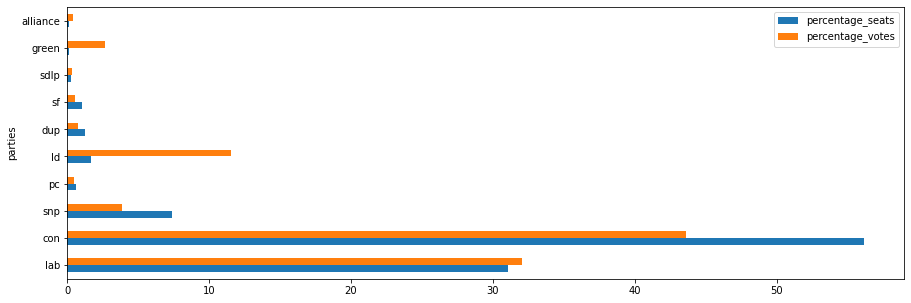

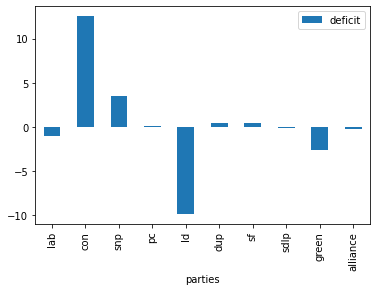

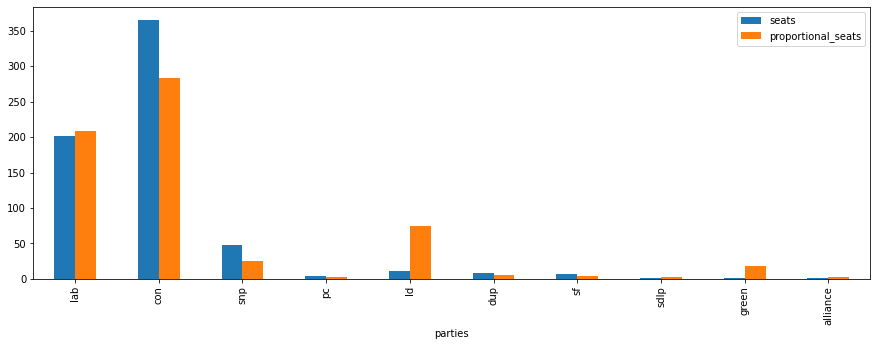

In [62]:
#share = [ total_votes_party[i]/total_votes*100 for i in range(0,len(total_votes_party))]

share_df = pd.DataFrame()
share_df['partiesdf'] = partiesdf
share_df['votes'] = total_votes_party
share_df['percentage_votes']=share_df['votes']/total_votes*100
share_df['seats'] = seats
share_df['percentage_seats']=share_df['seats']/650*100
share_df['deficit']=share_df['percentage_seats']-share_df['percentage_votes']
share_df['proportional_seats']=share_df['percentage_votes']/100*650

share_df.plot.barh(x='partiesdf',y=['percentage_seats','percentage_votes'],figsize=(15,5))
share_df.plot.bar(x='partiesdf',y='deficit')
share_df.plot.bar(x='partiesdf',y=['seats','proportional_seats'],figsize=(15,5))

share_df